In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import expon
from scipy.stats import norm

In [2]:
def simulExp(l, m, init, N, eps, T):
    
    def V(x):
        return -np.log(l)+l*x
    
    def deltaV(x):  # gradient de V 
        return l
    
    chain = [] 
    q = init # point de départ : espérance
    chain.append(q)
    acc = 0 # calculer le taux d'acceptation de Metropolis Hastings
    
    for n in range(1,N): # nombre de point de la chaine
        
        p = np.random.normal(0,m,1)[0] # p (le moment) suit une loi N(0,m)
        q = chain[n-1]
        pstar = p
        qstar = q
        
        for t in range(T): # leapfrog integrator
            ptemp = pstar - eps/2*deltaV(qstar)
            qstar = qstar + eps*ptemp
            pstar = ptemp - eps/2*deltaV(qstar)
        
        H = V(q) - norm(0,m).logpdf(p) # calcul de H(p,q)
            
        Hstar = V(qstar) - norm(0, m).logpdf(pstar) # calcul de H(p*,q*)
            
        r = min(1,np.exp(H-Hstar)) 
        
        if (qstar > 0) & (np.random.uniform(0,1,1)<r):
            chain.append(qstar)
            acc+=1
        else:
            chain.append(q)
        
    return {"chain" : np.array(chain), 'acc' : acc/N}

In [27]:
l = 3
m = 1

out = simulExp(l, m,1/l, 5000, 0.0005, 15)
chain = out['chain']
acc = out['acc']

0.9998

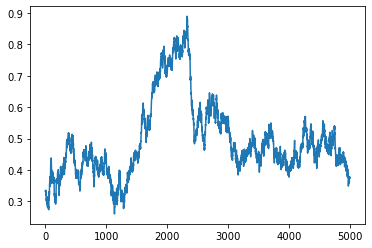

In [28]:
plt.plot(chain);
acc

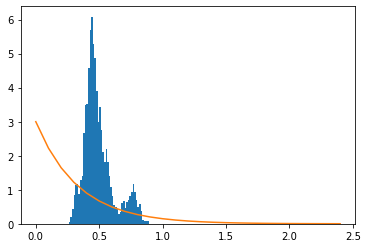

In [30]:
plt.hist(chain[50:], bins=50, density=True)
plt.plot(np.arange(0,2.5,0.1), expon.pdf(np.arange(0,2.5,0.1),scale=1/l));